In [185]:
from __future__ import print_function
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as pl
%pylab inline
import matplotlib
matplotlib.style.use('seaborn-colorblind')
%matplotlib inline
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
import datetime

Populating the interactive namespace from numpy and matplotlib


### I download these datasets from U.S. Department of State Air Quality Monitoring Program.
#### http://www.stateair.net/web/historical/1/1.html

In [186]:
beijingpm = pd.read_csv("Beijing_2015_HourlyPM25_created20160201.csv")

In [187]:
beijingpm.head()

,Site,Parameter,Date (LST),Year,Month,Day,Hour,Value,Unit,Duration,QC Name
0,Beijing,PM2.5,1/1/15 00:00,2015,1,1,0,22,�g/m_,1 Hr,Valid
1,Beijing,PM2.5,1/1/15 01:00,2015,1,1,1,9,�g/m_,1 Hr,Valid
2,Beijing,PM2.5,1/1/15 02:00,2015,1,1,2,9,�g/m_,1 Hr,Valid
3,Beijing,PM2.5,1/1/15 03:00,2015,1,1,3,13,�g/m_,1 Hr,Valid
4,Beijing,PM2.5,1/1/15 04:00,2015,1,1,4,10,�g/m_,1 Hr,Valid


In [188]:
beijingpm = beijingpm[["Date (LST)", "Value"]]
beijingpm.rename(index=str, columns={"Date (LST)": "Time"},inplace =True)
beijingpm.rename(index=str, columns={"Value": "PM2.5 Value"},inplace =True)
beijingpm.dropna(axis=0,inplace=True)

In [190]:
beijingpm.head()

,Time,PM2.5 Value
0,1/1/15 00:00,22
1,1/1/15 01:00,9
2,1/1/15 02:00,9
3,1/1/15 03:00,13
4,1/1/15 04:00,10


In [191]:
beijingpm["Time"] = beijingpm["Time"].apply(lambda x: pd.to_datetime(x))

In [192]:
beijingpm.head()

,Time,PM2.5 Value
0,2015-01-01 00:00:00,22
1,2015-01-01 01:00:00,9
2,2015-01-01 02:00:00,9
3,2015-01-01 03:00:00,13
4,2015-01-01 04:00:00,10


In [193]:
type(beijingpm)

pandas.core.frame.DataFrame

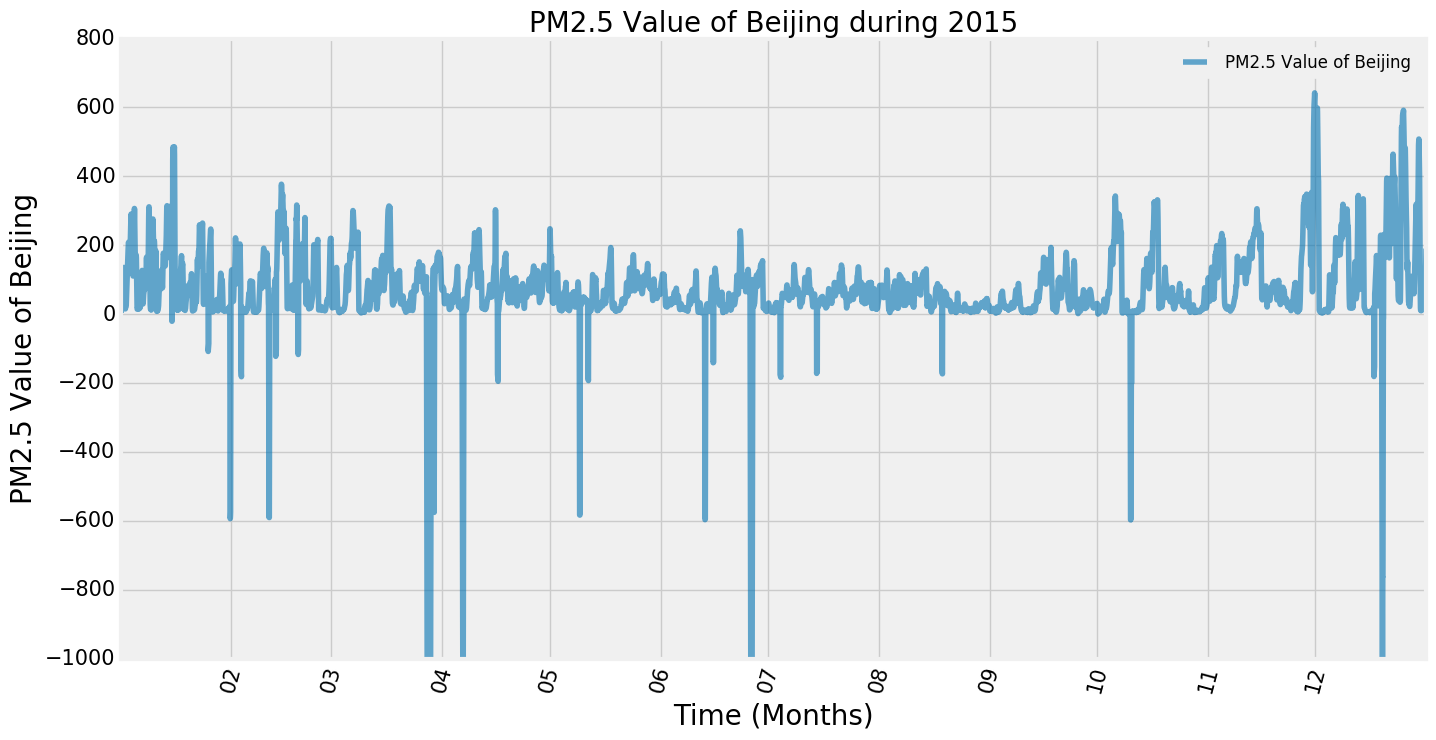

In [194]:
years = YearLocator()   # every year
months = MonthLocator()  # every month
yearsFmt = DateFormatter('%Y')
monthsFmt = DateFormatter('%m')
ax = pl.figure(figsize = (15,8)).gca()
ax.plot(beijingpm["Time"], beijingpm["PM2.5 Value"].rolling(window = 5).mean(),alpha=0.6,label="PM2.5 Value of Beijing")
pl.xlabel('Time (Months)', fontsize=20)
pl.ylabel('PM2.5 Value of Beijing', fontsize=20)
pl.title("PM2.5 Value of Beijing during 2015", fontsize=20)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
pl.xticks(rotation = 75, fontsize = 15)
pl.yticks(fontsize = 15)
pl.legend(loc="best")
pl.show()

### PM2.5 is correctly defined as particulate matter with a mean aerodynamic diameter of 2.5 μm, so the negative PM2.5 values are wrong ones. They should be dropped.

In [195]:
beijingpm = beijingpm[beijingpm["PM2.5 Value"] > 0].dropna()

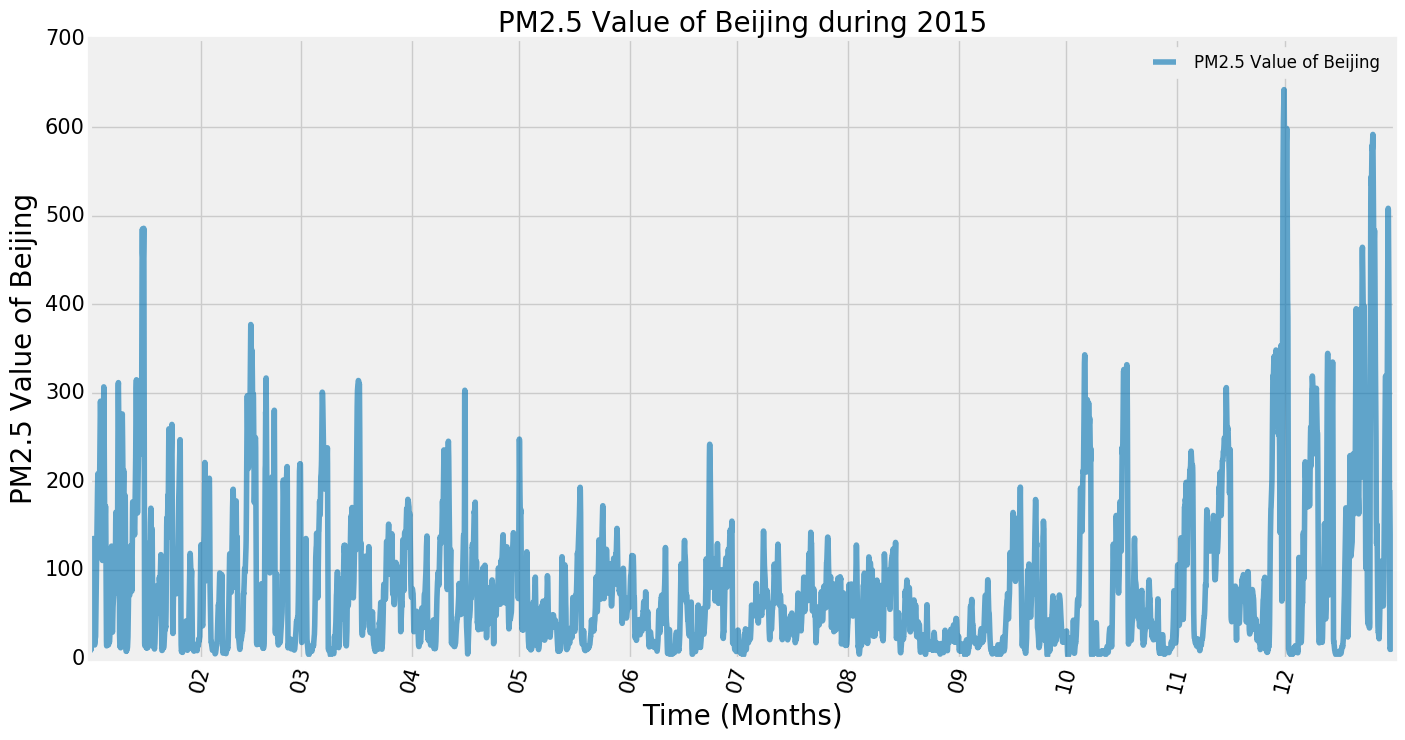

In [196]:
years = YearLocator()   # every year
months = MonthLocator()  # every month
yearsFmt = DateFormatter('%Y')
monthsFmt = DateFormatter('%m')
ax = pl.figure(figsize = (15,8)).gca()
ax.plot(beijingpm["Time"], beijingpm["PM2.5 Value"].rolling(window = 5).mean(),alpha=0.6,label="PM2.5 Value of Beijing")
pl.xlabel('Time (Months)', fontsize=20)
pl.ylabel('PM2.5 Value of Beijing', fontsize=20)
pl.title("PM2.5 Value of Beijing during 2015", fontsize=20)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
pl.xticks(rotation = 75, fontsize = 15)
pl.yticks(fontsize = 15)
pl.legend(loc="best")
pl.show()

### In February 2012, China released a new ambient air quality standard, GB 3095-2012, which sets limits for the first time on PM2.5. It is set according to the World Health Organization's Transitional Target 1. The standard level of daily PM2.5 average (24-hour) is 75 µg/m3.

### Check how many hours of 2015 did not meet the standard.

In [197]:
sum(i > 75 for i in beijingpm["PM2.5 Value"])

3316

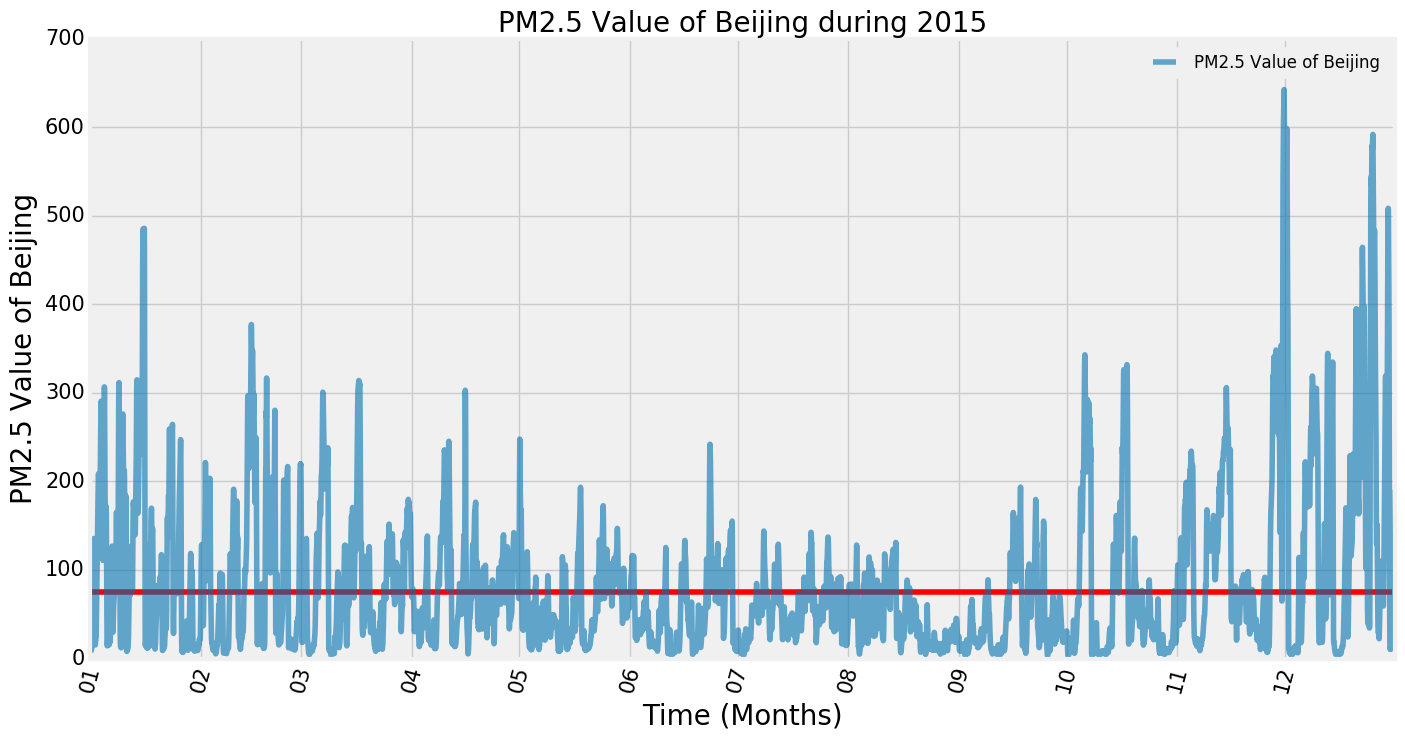

In [198]:
years = YearLocator()   # every year
months = MonthLocator()  # every month
yearsFmt = DateFormatter('%Y')
monthsFmt = DateFormatter('%m')
ax = pl.figure(figsize = (15,8)).gca()
pl.hlines(75, datetime.date(2015,1,1),datetime.date(2015,12,31), alpha=1,color="red")
ax.plot(beijingpm["Time"], beijingpm["PM2.5 Value"].rolling(window = 5).mean(),alpha=0.6,label="PM2.5 Value of Beijing")
pl.xlabel('Time (Months)', fontsize=20)
pl.ylabel('PM2.5 Value of Beijing', fontsize=20)
pl.title("PM2.5 Value of Beijing during 2015", fontsize=20)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
pl.xticks(rotation = 75, fontsize = 15)
pl.yticks(fontsize = 15)
pl.legend(loc="best")
pl.show()

## Figure 1:  PM2.5 Value of Beijing during 2015

### We can tell that the air pollution in Beijing is a serious problem for the fact that 3316 hours of 8760 hours (total hours of one year) did not meet the standard.

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


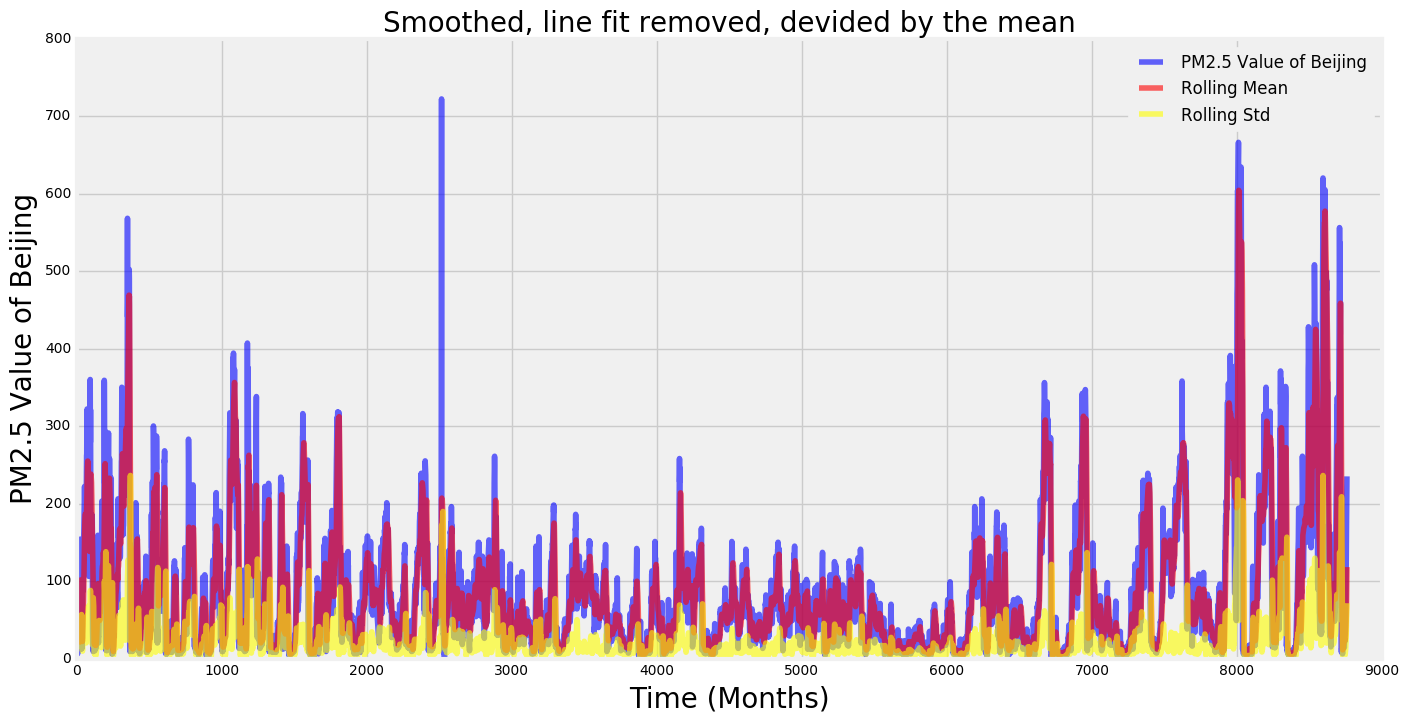

In [199]:
fig = pl.figure(figsize=(15,8))
ax = fig.add_subplot(111)
orig = plt.plot(beijingpm["PM2.5 Value"], color='blue',alpha=0.6,label='PM2.5 Value of Beijing')
ax.set_title("Smoothed, line fit removed, devided by the mean", fontsize=20)
pl.xlabel("Time (Months)", fontsize=20)
pl.ylabel("PM2.5 Value of Beijing", fontsize=20)
rolmean = pd.rolling_mean(beijingpm["PM2.5 Value"], window=12)
rolstd = pd.rolling_std(beijingpm["PM2.5 Value"], window=12)
mean = plt.plot(rolmean, color='red',alpha=0.6, label='Rolling Mean')
std = plt.plot(rolstd, color='yellow',alpha=0.6, label = 'Rolling Std')
pl.legend(loc='best')
pl.show(block=False)

### Figure 2: Rolling means and Rolling Standrad Deviations of PM2.5 Value of Beijing during 2015

In [200]:
##from statsmodels.tsa.stattools import adfuller

In [201]:
##dftest = adfuller(pm["PM2.5 Value"], autolag='AIC')
##dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
##for key,value in dftest[4].items():
    ##dfoutput['Critical Value (%s)'%key] = value
##print(dfoutput)

## Event Detect

### We can tell by Figure 1 and Figure 2, in September there is a period of time of which all the PM2.5 calues met the standard.
### After seaching on the internet, I find in September, Beijing planned a huge military parade to celebrate China’s 70th anniversary of the victory during World War II. The city temporarily closed hundreds of factories and banned half of the cars in the city from driving. That is a reduction of about 2.5 million cars. https://www.davidwolfe.com/beijing-sees-blue-skies-after-banning-2-5-million-cars-for-a-military-parade/
### So we can also know emssions of factories and cars are main factors of air pollution in Beijing.

### What's more, we can see the PM2.5 values are really high in December, January and February. In my opinion, I see coal burning as another main factor of air pollution in Beijing, cause the winter starts from December to February in Beijing and tons of coals are burnt for heating during this time.

## Is air pollution a nationwide problem?

In [202]:
shanghaipm = pd.read_csv("Shanghai_2015_HourlyPM25_created20160201.csv")

chengdupm = pd.read_csv("Chengdu_2015_HourlyPM25_created20160201.csv")

guangzhoupm = pd.read_csv("Guangzhou_2015_HourlyPM25_created20160201.csv")

shenyangpm = pd.read_csv("Shenyang_2015_HourlyPM25_created20160201.csv")

In [203]:
shanghaipm = shanghaipm[["Date (LST)", "Value"]]
shanghaipm.rename(index=str, columns={"Date (LST)": "Time"},inplace =True)
shanghaipm.rename(index=str, columns={"Value": "PM2.5 Value"},inplace =True)
shanghaipm.dropna(axis=0,inplace=True)

chengdupm = chengdupm[["Date (LST)", "Value"]]
chengdupm.rename(index=str, columns={"Date (LST)": "Time"},inplace =True)
chengdupm.rename(index=str, columns={"Value": "PM2.5 Value"},inplace =True)
chengdupm.dropna(axis=0,inplace=True)

guangzhoupm = guangzhoupm[["Date (LST)", "Value"]]
guangzhoupm.rename(index=str, columns={"Date (LST)": "Time"},inplace =True)
guangzhoupm.rename(index=str, columns={"Value": "PM2.5 Value"},inplace =True)
guangzhoupm.dropna(axis=0,inplace=True)

shenyangpm = shenyangpm[["Date (LST)", "Value"]]
shenyangpm.rename(index=str, columns={"Date (LST)": "Time"},inplace =True)
shenyangpm.rename(index=str, columns={"Value": "PM2.5 Value"},inplace =True)
shenyangpm.dropna(axis=0,inplace=True)

In [204]:
shanghaipm["Time"] = shanghaipm["Time"].apply(lambda x: pd.to_datetime(x))

chengdupm["Time"] = chengdupm["Time"].apply(lambda x: pd.to_datetime(x))

guangzhoupm["Time"] = guangzhoupm["Time"].apply(lambda x: pd.to_datetime(x))

shenyangpm["Time"] = shenyangpm["Time"].apply(lambda x: pd.to_datetime(x))

In [205]:
shanghaipm = shanghaipm[shanghaipm["PM2.5 Value"] > 0].dropna()

chengdupm = chengdupm[chengdupm["PM2.5 Value"] > 0].dropna()

guangzhoupm = guangzhoupm[guangzhoupm["PM2.5 Value"] > 0].dropna()

shenyangpm =shenyangpm[shenyangpm["PM2.5 Value"] > 0].dropna()

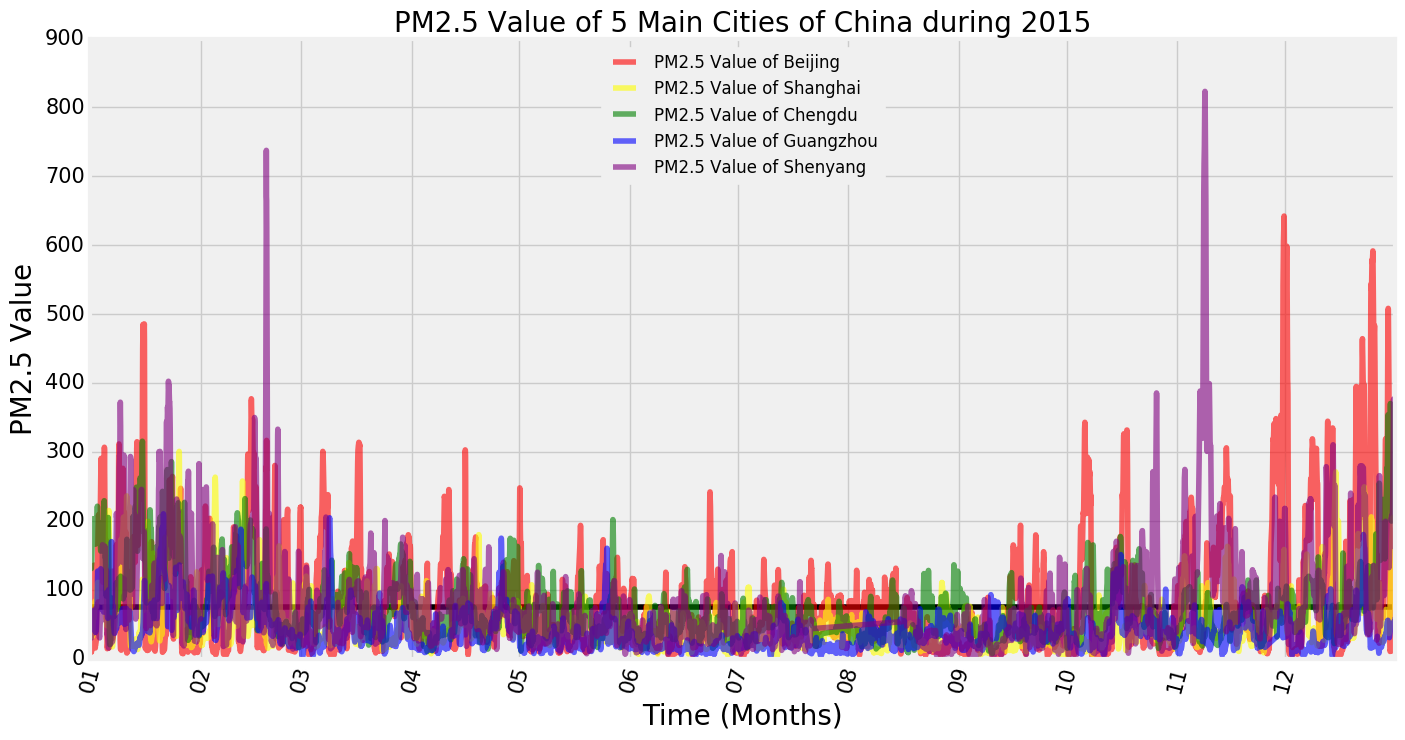

In [208]:
years = YearLocator()   # every year
months = MonthLocator()  # every month
yearsFmt = DateFormatter('%Y')
monthsFmt = DateFormatter('%m')
ax = pl.figure(figsize = (15,8)).gca()
pl.hlines(75, datetime.date(2015,1,1),datetime.date(2015,12,31), alpha=1,color="black")

ax.plot(beijingpm["Time"], beijingpm["PM2.5 Value"].rolling(window = 5).mean(),color='red',alpha=0.6,label="PM2.5 Value of Beijing")
ax.plot(shanghaipm["Time"], shanghaipm["PM2.5 Value"].rolling(window = 5).mean(),color='yellow',alpha=0.6,label="PM2.5 Value of Shanghai")
ax.plot(chengdupm["Time"], chengdupm["PM2.5 Value"].rolling(window = 5).mean(),color='green',alpha=0.6,label="PM2.5 Value of Chengdu")
ax.plot(guangzhoupm["Time"], guangzhoupm["PM2.5 Value"].rolling(window = 5).mean(),color='blue',alpha=0.6,label="PM2.5 Value of Guangzhou")
ax.plot(shenyangpm["Time"], shenyangpm["PM2.5 Value"].rolling(window = 5).mean(),color='purple',alpha=0.6,label="PM2.5 Value of Shenyang")

pl.xlabel('Time (Months)', fontsize=20)
pl.ylabel('PM2.5 Value', fontsize=20)
pl.title("PM2.5 Value of 5 Main Cities of China during 2015", fontsize=20)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
pl.xticks(rotation = 75, fontsize = 15)
pl.yticks(fontsize = 15)
pl.legend(loc="best")
pl.show(block=True)

## Figure 3: PM2.5 Value of 5 Main Cities of China during 2015

### Air pollution happens in all of these 5 main cities of China.
### Beijing and Shenyang are North cities of China; Shanghai, Guangzhou and Chengdu are located in the South. We can tell that , among these cities, air pollution of the North ones are more serious than that of the South, especially in winter.
### This may due to the fact that North cities burn coals for heating in the winter and there are no public heating systems in South cities of China.